# Heart Disease Detection - Ada Boost

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
#formatting dataframe to 2 decimal precision
pd.options.display.float_format = "{:,.2f}".format

## Exploratory Data Analysis

In [3]:
df = pd.read_csv("heart.csv")
df.head(9)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.40,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.30,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.00,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.50,2,0,3,1


In [4]:
print(df.shape)
df.describe()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


Checking the data types:

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Now let's check if there is any missing value:

In [6]:
df.isna().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Correlation Matrix -

It gives pair wise relationship between variables.

In [52]:
import seaborn as sns
sns.set()
corr_metrics = df.corr()
corr_metrics.style.background_gradient()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


It seems that "cp", "thalach", "slope" and "restepg" have more correlation with target value. but as we see in the matrix, "thalach" and "slope" have a considerable correlation with each other,  and we see the same thing for "cp", and "thalach" so probaely we should be careful about multicolinearity. 

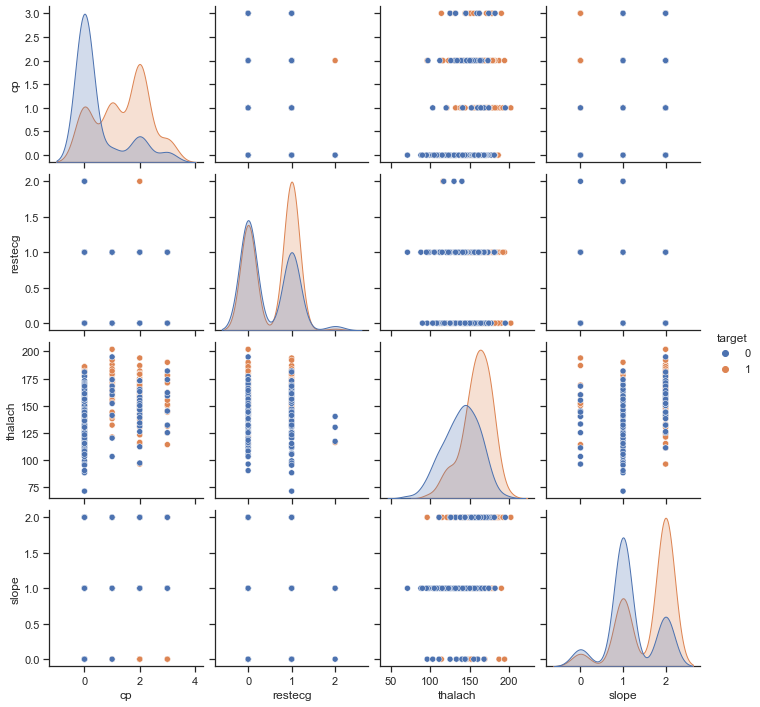

In [8]:
df_subset = df[["target","cp", "restecg", "thalach", "slope"]]

sns.set_theme(style="ticks")
sns.pairplot(df_subset, hue="target")

As we see in the pair plot, the four features have different distributions for each target class.

#### Distributions of each variable:

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

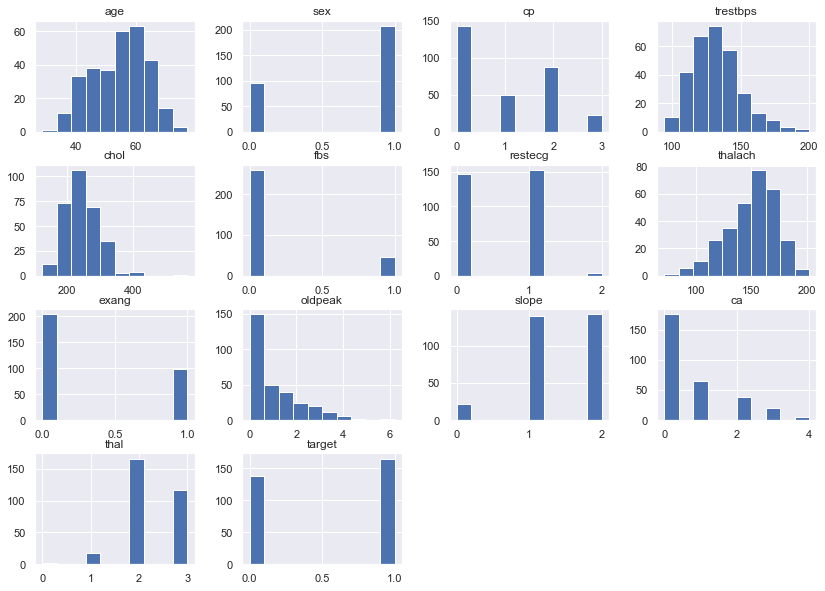

In [54]:
df.hist(figsize = (14,10))

## Ada Boost

In [256]:
X=df.drop('target',axis=1).values    
y=df['target'].values

In [257]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [258]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50, random_state=0)
ada.fit(X, y)

AdaBoostClassifier(random_state=0)

In [259]:
ada_yhat = ada.predict(X_test)
ada_yhat [0:5]

array([1, 0, 1, 1, 0], dtype=int64)

#### Ada Boost Evaluation -

In [260]:
from sklearn import metrics

ada_Score = metrics.accuracy_score(y_test, ada_yhat)
print("Train set Accuracy: ", round(100*metrics.accuracy_score(y_train, ada.predict(X_train)),2))
print("Ada Boost's Accuracy: ", round(100*ada_Score, 2))

Train set Accuracy:  91.32
Ada Boost's Accuracy:  93.44


Confusion matrix, without normalization
[[33  3]
 [ 1 24]]


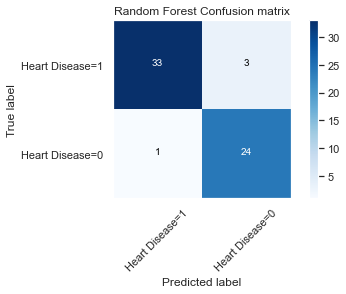

In [261]:
# Compute confusion matrix
ada_cnf_matrix = confusion_matrix(y_test, ada_yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(ada_cnf_matrix, classes=['Heart Disease=1','Heart Disease=0'],normalize= False,  title='Random Forest Confusion matrix')

In [262]:
print (classification_report(y_test, ada_yhat))
ada_Recall = recall_score(y_test, ada_yhat)
ada_F1Score = f1_score(y_test, ada_yhat)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        25
           1       0.97      0.92      0.94        36

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61

